In [1]:
import pandas as pd
import numpy as np
import pymysql
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('iris_dirty.csv', names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# 1 EDA

In [3]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [4]:
df.shape

(151, 5)

In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width      object
class            object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    object 
 4   class         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length
count,151.000000,150.000000,151.000000
mean,6.196689,3.057333,3.764901
std,4.324325,0.432776,1.760197
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.400000
75%,6.400000,3.300000,5.100000
max,58.000000,4.400000,6.900000


# 2 Data Cleaning

In [8]:
# petal width with "mm" remove and bring to same decimal

# correct spelling errors in last column

# one null in sepal width, include mean to not delete the column

# remove duplicates

In [9]:
# petal width with "mm" remove and bring to same decimal
df['petal_width'] = df['petal_width'].str.extract('(\d+)').astype('float64').div(10)

In [10]:
df.head(25)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [11]:
# correct spelling errors in last column
df['class'].replace({'Iris-setsoa' : 'Iris-setosa'}, inplace=True)

In [12]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
# include mean for empty values
df['sepal_width'].fillna((df['sepal_width'].mean()), inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   151 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    float64
 4   class         151 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
# remove duplicates if any
df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
df.shape

(151, 5)

# Vizualisation

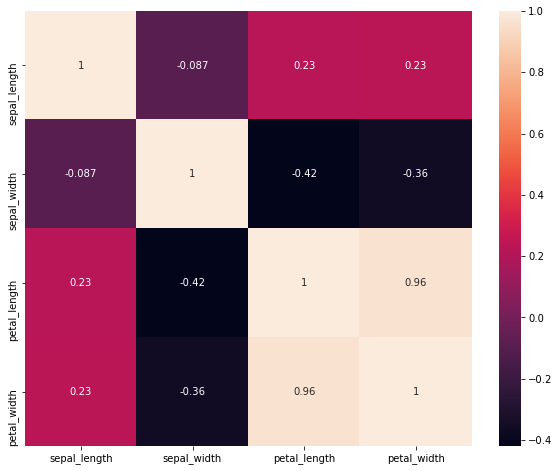

In [17]:
corrmatrix = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix, annot=True)
plt.show()

# Pre Processing Data

In [18]:
df1 = df
df1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,151.000000,151.000000,151.000000,151.000000
mean,6.196689,3.057333,3.764901,1.200000
std,4.324325,0.431331,1.760197,0.760789
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,58.000000,4.400000,6.900000,2.500000


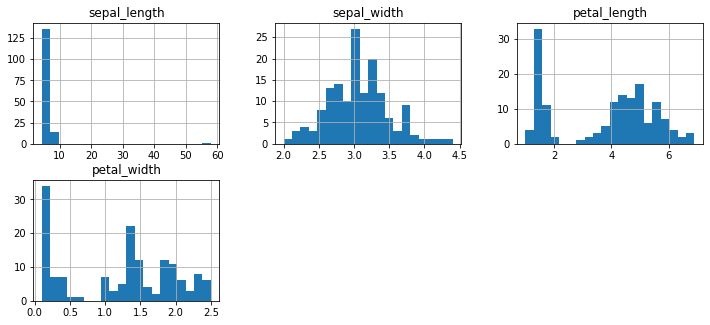

In [19]:
df1.hist(bins=20, figsize=(12, 8), layout=(3, 3));

In [20]:
# remove just one outlier with sepal length over 50, seems to be an error
df1 = df1[df1['sepal_length'] < 50]  

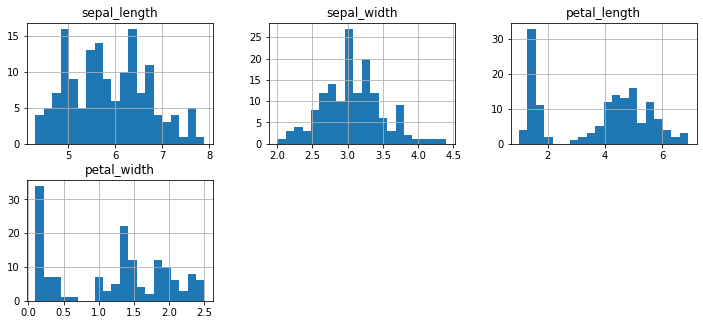

In [21]:
df1.hist(bins=20, figsize=(12, 8), layout=(3, 3));

In [22]:
# Set dependent and independet variable
X = df1.select_dtypes(include=np.number)
y = df1['class'].to_frame()

In [23]:
# Normalize Data
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X)
X_normalised= transformer.transform(X)
X_normalised = pd.DataFrame(X_normalised)

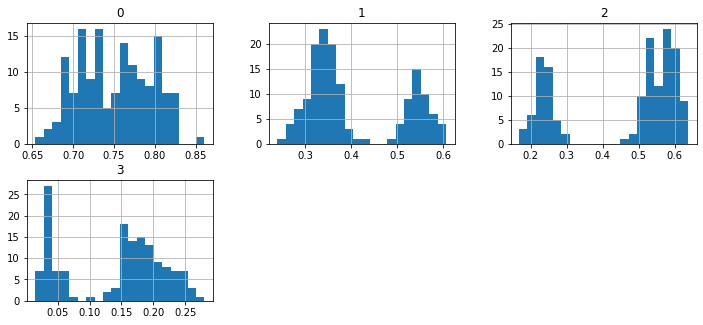

In [24]:
X_normalised.hist(bins=20, figsize=(12, 8), layout=(3, 3));

In [25]:
# tt split, get model
from sklearn.linear_model import LogisticRegression
X = X_normalised

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.3, random_state=40)

In [27]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)

/Users/Jerrit/opt/anaconda3/envs/excondables/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [28]:
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)

In [59]:
predictions

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [29]:
accuracy_score(y_test, predictions)

0.9333333333333333

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df1['class'], classification.predict(X))

array([[50,  0,  0],
       [ 0, 45,  6],
       [ 0,  0, 49]])

# Bonus  - without removing the outlier for sepal_length

In [47]:
df2 = df

In [48]:
X2 = df2.select_dtypes(include=np.number)
y2 = df2['class'].to_frame()

In [49]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X2)
X2_normalised= transformer.transform(X2)
X2_normalised = pd.DataFrame(X2_normalised)

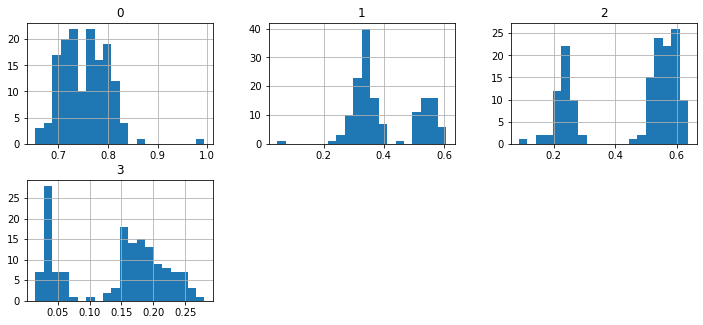

In [50]:
X2_normalised.hist(bins=20, figsize=(12, 8), layout=(3, 3));

In [51]:
X2 = X2_normalised

In [52]:
X2_train, X2_test, y2_train, y2_test =train_test_split(X2, y2, test_size= 0.3, random_state=40)

In [53]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X2_train, y2_train)

/Users/Jerrit/opt/anaconda3/envs/excondables/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [60]:
predictions = classification.predict(X_test)

In [55]:
accuracy_score(y_test, predictions)

0.9555555555555556

<ipython-input-64-6f3452dbe64b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-64-6f3452dbe64b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


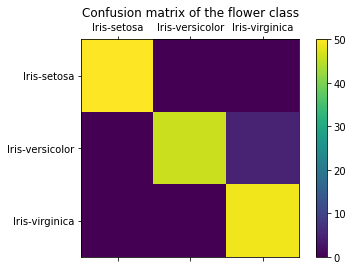

In [64]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm = confusion_matrix(df1['class'], classification.predict(X))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the flower class')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()

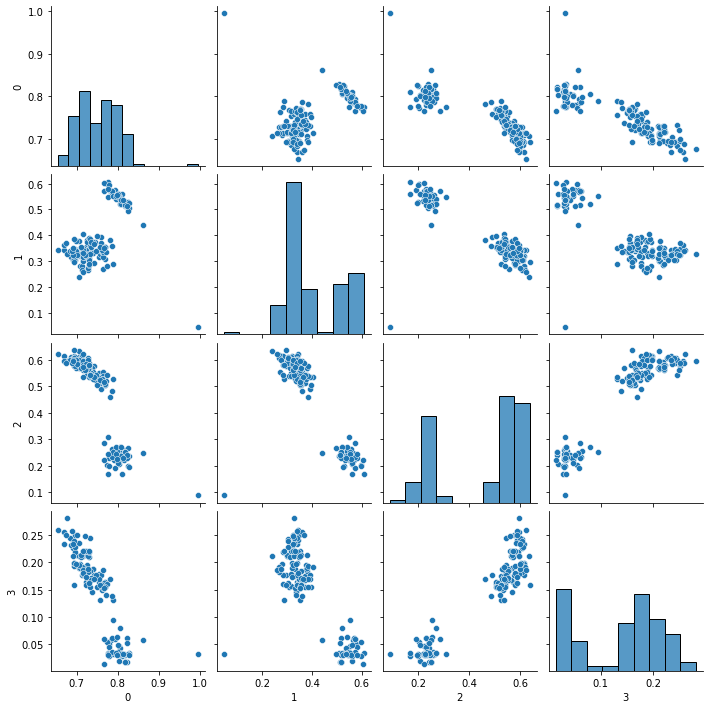

In [58]:
sns.pairplot(X2)